In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

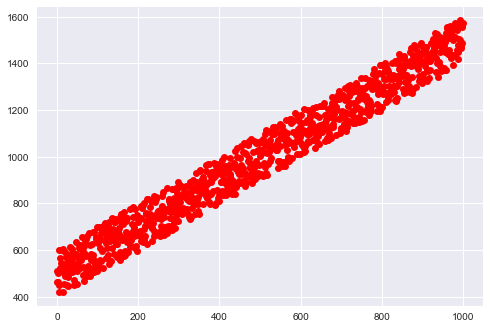

In [213]:
noiseSize = 100
size = 1000

sample = np.arange(size*2).reshape( (2, size) )
# sample[1] = np.sqrt(size - sample)[0]
sample[1] = sample[0] + 500
sample[1] = sample[1] + (np.random.rand(1,size) - .5) * noiseSize*2
sample = sample.T

plt.plot(sample[:,0], sample[:,1], 'ro')

In [230]:
data = sample
n = 2
m = data.shape[0]

x = data[:, :n-1]
x = np.concatenate((np.ones((1,m)), x.T)).T

y = np.array( data[:,-1] )
y = y.T

print(x)
print(y)

[[   1.    0.]
 [   1.    1.]
 [   1.    2.]
 ..., 
 [   1.  997.]
 [   1.  998.]
 [   1.  999.]]
[ 511  461  500  462  419  598  451  521  565  598  521  543  518  525  606
  542  420  501  454  487  591  494  516  568  550  451  446  483  542  500
  534  613  536  525  582  539  506  562  604  589  512  473  532  448  515
  525  541  583  633  454  511  534  568  561  608  623  621  521  603  559
  574  655  584  492  597  528  469  615  584  573  638  505  648  489  661
  497  530  575  508  674  523  488  623  582  559  507  506  625  675  578
  558  678  505  526  541  545  655  647  512  697  632  517  535  699  650
  607  646  556  673  551  691  594  676  524  704  674  643  682  716  712
  628  564  666  610  652  704  580  688  720  542  637  554  649  672  551
  607  735  689  656  684  583  721  733  639  719  661  627  627  571  663
  656  682  670  694  559  593  743  756  720  739  644  574  711  577  574
  654  761  579  594  725  679  736  735  634  590  670  664  647 

In [231]:
# # TODO: make it faster!
# scaleInfo = []

# for i in range(0,n):
#     scaleInfo.append( [x[:,i].min(), x[:,i].max(), x[:,i].mean()] )

# print( scaleInfo )

# for i in range(0, m):
#     for j in range(0, n):
#         x[i][j] = (x[i][j] - scaleInfo[j][2]) / (scaleInfo[j][1])

In [232]:
# theta[0] = theta[0] * scaleInfo[0][1] + scaleInfo[0][2]
# theta[1] = theta[1] * scaleInfo[1][1] + scaleInfo[1][2]
# theta

theta: [ 0.00378648  1.69232466]


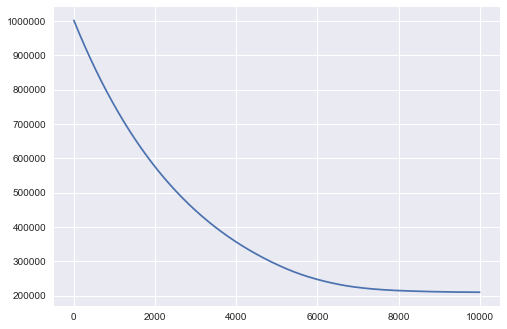

In [233]:
autoAlphaSelect = False
iterCount = 10000
alpha = .000000001
theta = np.array(n * [0])

j = []
complete = False

while( not complete ):
    complete = True
    for _ in range(0, iterCount):
        h = np.dot(x , theta.T).T
        loss = h - y
        gradient = np.dot(loss , x)
        theta = theta - alpha * gradient / m
        j += [ abs(np.array(loss)).sum() ]
        
        # fix big alpha
        if ( autoAlphaSelect and j[ len(j)-1 ] > j[ len(j)-2 ]):
            complete = False
            alpha = alpha / 10
            print('alpha:', alpha)
            theta = np.array(n * [0])
            j.clear()
            break

print('theta:', theta )
plt.plot(j)

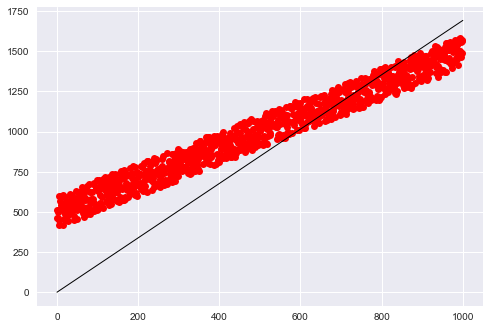

In [234]:
plt.plot(sample[:,0], sample[:,1], 'ro')
plt.plot([0, m], [theta[0],  theta[0] + m*theta[1]], 'k-', lw=1)

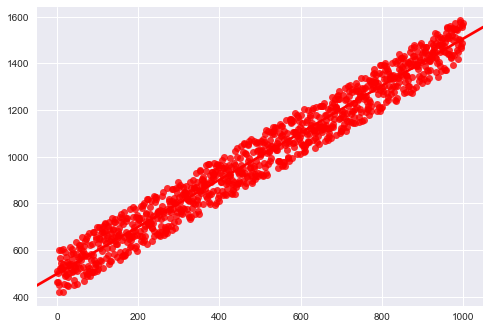

In [235]:
sns.regplot(sample[:,0], sample[:,1], color='red')